# Problem Statement
Optimize the advertising strategy for a media company by developing a predictive model to analyze the impact of TV, radio, and newspaper advertising on product sales. This challenge involves exploring the correlation between advertising expenditures across different channels and the resulting sales figures. The goal is to identify the most effective media mix, allocate resources efficiently, and maximize the return on investment. The successful implementation of this model will contribute to data-driven decision-making in the marketing domain, providing insights into the relative effectiveness of TV, radio, and newspaper advertising in driving product sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

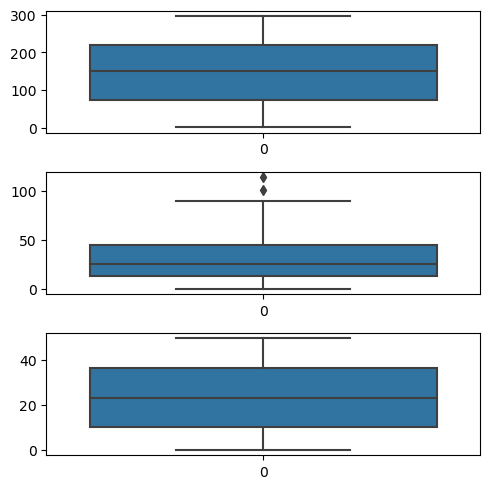

In [6]:
fig, axs =plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df['TV'],ax=axs[0])
plt2 = sns.boxplot(df['Newspaper'],ax =axs[1])
plt3 = sns.boxplot(df['Radio'],ax=axs[2])
plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_5628\3262100579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

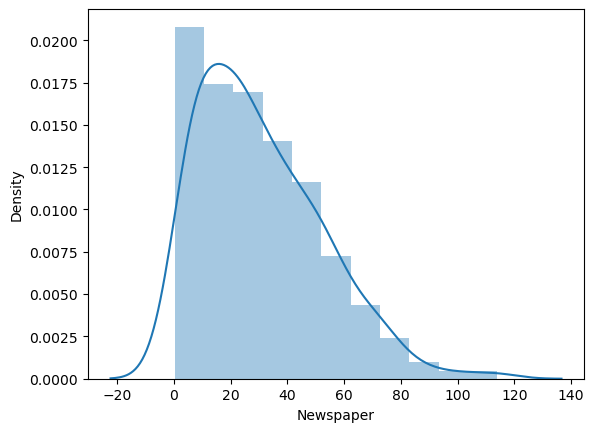

In [7]:
sns.distplot(df['Newspaper'])

In [8]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [9]:
lower_bridge =df['Newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge =df['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [10]:
data=df.copy()

In [11]:
data.loc[data['Newspaper']>93,'Newspaper']=93

<Axes: >

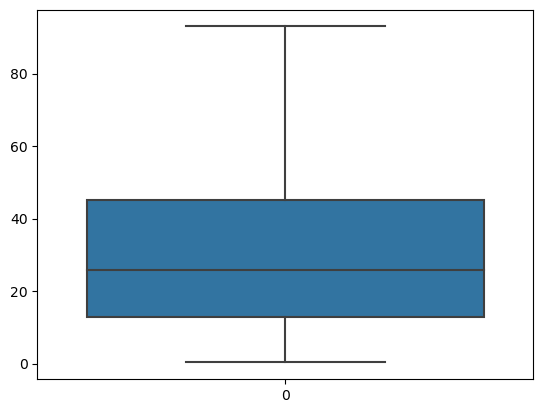

In [12]:
sns.boxplot(data['Newspaper'])

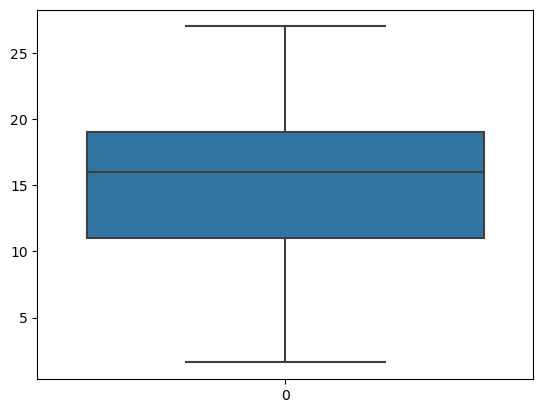

In [13]:
sns.boxplot(data['Sales']);

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


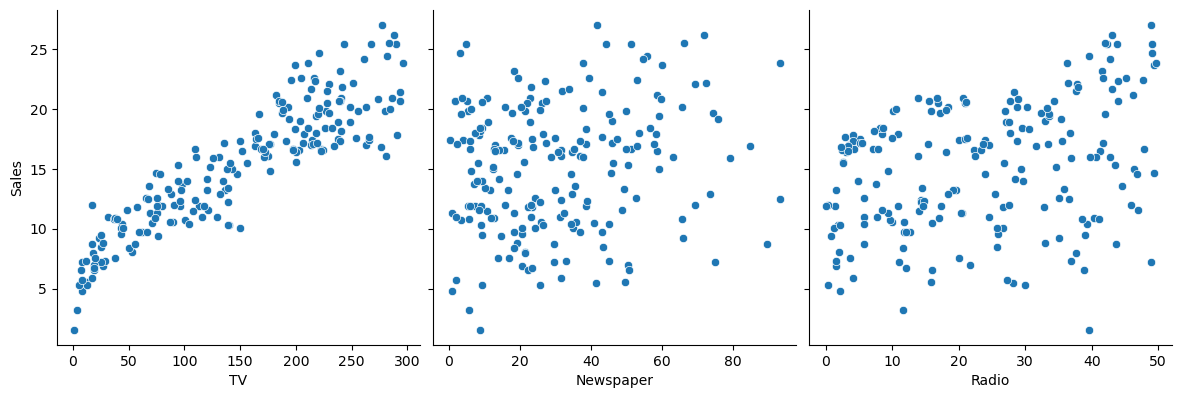

In [14]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

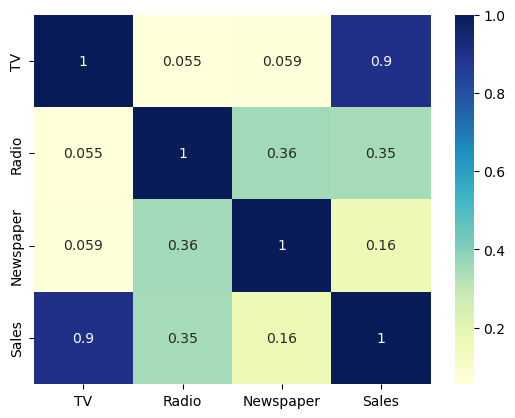

In [15]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [16]:
X= df.drop('Sales',axis=1)
y= df['Sales']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
lr.score(x_test,y_test)

0.9071151423684273

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor()

In [24]:
model.fit(x_train,y_train)


RandomForestRegressor()

In [25]:
model.score(x_test,y_test)

0.9623759503028038